# Supervised Learning - Building a Student Performace Prediction System


# Classification vs. Regression
The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?
Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

# Logistic Regression

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance

# Question 1 - Exploring the Data (0.5 points)
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [88]:
import pandas as pd 
school_df = pd.read_csv('students-data.csv', sep=';')
school_df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Question 2 - drop missing values (0.5 points)
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*
*Use .dropna() function to drop the NAs*

#### Answer:

In [89]:
school_df.index.name='number'
print(school_df.head())
school_df.columns
print("There are " +str(school_df.isnull().sum().sum()) +'  NULL values')

       school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

       ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
number ...                                                                 
0      ...      4        3      4     1     1      3        6   5   6   6  
1      ...      5        3      3     1     1      3        4   5   5   6  
2      ...      4        3      2     2     3      3       10   7   8  10  
3      ...      3        2      2     1     1      5

# Transform Data

## Question 3 (0.5 points)

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [95]:
school_df.select_dtypes(include=['number'])
school_df.select_dtypes(exclude=['integer'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


# Question 4 - Drop variables with less variance (0.5 points)

*Find the variance of each numerical independent variable and drop whose variance is less than 1. Use .var function to check the variance*

In [96]:
var_column = []
numerical_df=school_df.select_dtypes(include=['number'])
for col in numerical_df.columns:
    if(numerical_df[col].var() < 1):
        var_column.append(col)
print(var_column)
numerical_df.drop(columns=var_column)
numerical_df.head()
#print(type(numerical_df.var()))
#numberical_df.drop()

['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc']


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


#### Variables with less variance are almost same for all the records. Hence, they do not contribute much for classification.

# Question 6 - Encode all categorical variables to numerical (0.5 points)

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [97]:
import sklearn as sk
from sklearn import preprocessing
category_df = school_df.select_dtypes(exclude=['integer'])
print(category_df.head())
obj_en = preprocessing.LabelEncoder()
for col in category_df.columns:
    category_df[col] = obj_en.fit_transform(category_df[col])
print(category_df)

       school sex address famsize Pstatus     Mjob      Fjob  reason guardian  \
number                                                                          
0          GP   F       U     GT3       A  at_home   teacher  course   mother   
1          GP   F       U     GT3       T  at_home     other  course   father   
2          GP   F       U     LE3       T  at_home     other   other   mother   
3          GP   F       U     GT3       T   health  services    home   mother   
4          GP   F       U     GT3       T    other     other    home   father   

       schoolsup famsup paid activities nursery higher internet romantic  
number                                                                    
0            yes     no   no         no     yes    yes       no       no  
1             no    yes   no         no      no    yes      yes       no  
2            yes     no  yes         no     yes    yes      yes       no  
3             no    yes  yes        yes     yes    yes   

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


        school  sex  address  famsize  Pstatus  Mjob  Fjob  reason  guardian  \
number                                                                         
0            0    0        1        0        0     0     4       0         1   
1            0    0        1        0        1     0     2       0         0   
2            0    0        1        1        1     0     2       2         1   
3            0    0        1        0        1     1     3       1         1   
4            0    0        1        0        1     2     2       1         0   
5            0    1        1        1        1     3     2       3         1   
6            0    1        1        1        1     2     2       1         1   
7            0    0        1        0        0     2     4       1         1   
8            0    1        1        1        0     3     2       1         1   
9            0    1        1        0        1     2     2       1         1   
10           0    0        1        0   

# Question 7 - Convert the continuous values of grades into classes (1 point)

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [99]:
import numpy as np 
for col in ('G1','G2','G3'):
    numerical_df[col]=np.where(numerical_df[col]>=10,1,0)
    #rint(pass1)
        
numerical_df.head()
    # if(numerical_df[col].var() < 1):
       # var_column.append(col)
    #print(len(numerical_df[col]))

C:\Users\SUPERMAN1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,
0,18,4,4,2,2,0,4,3,4,1,1,3,6,0,0,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,0,0,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,0,0,1
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,1,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,0,1,1


# Question 8 (0.5 points)

*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate feature and target attributes into separate dataframes with X and y variable names.*

In [109]:
final_df = pd.concat([numerical_df,category_df], axis = 1)
target_df = final_df['G3']
final_df = final_df.drop(['G3'],axis=1)
print(final_df.shape)
print(target_df.shape)

(395, 32)
(395,)


# Question 9 - Training and testing data split (0.5 points)

# *So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(final_df,target_df, test_size=0.24,random_state=42)
x_train.shape,x_test.shape

((300, 32), (95, 32))

# Question 10 - Model Implementation and Testing the Accuracy (0.5 points)

*Build a **LogisticRegression** classifier using **fit()** functions in sklearn. 
* You need to import both Logistic regression and accuracy score from sklearn*
#### Answer:

In [121]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)
print(logisticRegr.score(x_train,y_train))

0.9233333333333333


# Question 11 - Print the intercept of the Logistic regression model (0.5 points)

The value of the intercepts are stored in the model itself. You can use .intercept_ function to do the same

In [120]:
logisticRegr.intercept_

array([0.42716067])

# Question 12 - Print the coefficients of the model (0.5 points) and name the coefficient which has the highest impact on the dependent variable (0.5 points)

Hint: Use .coef_ to get the coefficients and use pd.Dataframe to store the coefficients in a dataframe with column names same as the independent variable dataframe

In [122]:
print(logisticRegr.coef_)

[[-0.21757998  0.14219069 -0.45551081  0.13155808 -0.18165948 -0.38792249
   0.42357132  0.11326842 -0.33357308 -0.3925634   0.56205824 -0.00859296
  -0.02397245  1.36215998  3.87821845 -0.01703705 -0.01561558  0.14493516
  -0.24049911 -0.41101291  0.02759782  0.20373322  0.14465501  0.22519709
  -0.2342477  -0.43077571  0.57999853 -0.42601927 -0.21248224  1.00085713
  -0.12042038 -0.27776185]]


In [125]:
coeff_df = pd.DataFrame(data=logisticRegr.coef_,columns=final_df.columns).transpose()
coeff_df

,0
age,-0.217580
Medu,0.142191
Fedu,-0.455511
traveltime,0.131558
studytime,-0.181659
failures,-0.387922
famrel,0.423571
freetime,0.113268
goout,-0.333573
Dalc,-0.392563


# Question 13 - Predict the dependent variable for both training and test dataset (0.5 points)

Accuracy score() should help you to print the accuracies

In [128]:
logisticRegr.predict(x_test)
print(logisticRegr.coef_)
print(logisticRegr.score(x_test,y_test))

[[-0.21757998  0.14219069 -0.45551081  0.13155808 -0.18165948 -0.38792249
   0.42357132  0.11326842 -0.33357308 -0.3925634   0.56205824 -0.00859296
  -0.02397245  1.36215998  3.87821845 -0.01703705 -0.01561558  0.14493516
  -0.24049911 -0.41101291  0.02759782  0.20373322  0.14465501  0.22519709
  -0.2342477  -0.43077571  0.57999853 -0.42601927 -0.21248224  1.00085713
  -0.12042038 -0.27776185]]
0.9157894736842105


# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [4]:
import pandas as pd
bc_df = pd.read_csv('bc2.csv')
bc_df.head()
bc_df['Class'] =bc_df['Class'].astype('object')
bc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                          object
dtype: object

### Observe the no.of records in dataset and type of each feature 

In [5]:
print(bc_df.shape)
print(bc_df.dtypes)

(699, 11)
ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                          object
dtype: object


### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [6]:
print(bc_df.describe(include='all'))

                  ID  ClumpThickness   Cell Size  Cell Shape  \
count   6.990000e+02      699.000000  699.000000  699.000000   
unique           NaN             NaN         NaN         NaN   
top              NaN             NaN         NaN         NaN   
freq             NaN             NaN         NaN         NaN   
mean    1.071704e+06        4.417740    3.134478    3.207439   
std     6.170957e+05        2.815741    3.051459    2.971913   
min     6.163400e+04        1.000000    1.000000    1.000000   
25%     8.706885e+05        2.000000    1.000000    1.000000   
50%     1.171710e+06        4.000000    1.000000    1.000000   
75%     1.238298e+06        6.000000    5.000000    5.000000   
max     1.345435e+07       10.000000   10.000000   10.000000   

        Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
count          699.000000                   699.000000         699   
unique                NaN                          NaN          11   
top                  

### Check Missing Values

In [7]:
print(bc_df.isnull().sum().sum())

0


### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

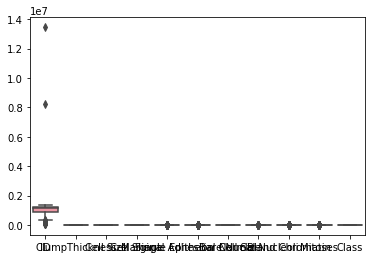

In [9]:
%matplotlib inline
import numpy as np
bc_df['Bare Nuclei']=np.where(bc_df['Bare Nuclei'] == '?',bc_df.describe(include='all')['Bare Nuclei'].top,bc_df['Bare Nuclei'])
bc_df['Bare Nuclei']
import seaborn as sns
sns.boxplot(data=bc_df)

In [214]:
#bc_df['Bare Nuclei'] = bc_df['Bare Nuclei'].astype('int64')
q1 = bc_df.quantile(0.25)

q3 = bc_df.quantile(0.75)

IQR = q3 - q1

minCap = q1 - (1.5 * IQR)

maxCap = q3 + (1.5 * IQR)

# print(minCap,maxCap)

bc_df = bc_df.where((bc_df>= minCap)&(bc_df<=maxCap))

bc_df.shape

#drop NaN rows

bc_df.dropna(axis = 0, how = 'any',inplace = True)
sns.boxplot(data=bc_df['ID'])

ValueError: Boolean array expected for the condition, not int64

### Print and plot the distribution of target variable (Class - using Histogram) 

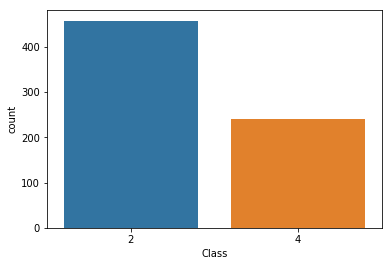

In [10]:
import seaborn as sns
sns.countplot(bc_df['Class'])

### convert the datatype of Bare Nuclei to `int`

In [11]:
bc_df['Bare Nuclei'] = bc_df['Bare Nuclei'].astype('int64')
bc_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                     int64
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                          object
dtype: object

### Standardization of Data (Use Standard Scaler)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

print(scaler.fit(bc_df))

print(scaler.mean_)
print(bc_df)

StandardScaler(copy=True, with_mean=True, with_std=True)
[1.07170410e+06 4.41773963e+00 3.13447783e+00 3.20743920e+00
 2.80686695e+00 3.21602289e+00 3.48640916e+00 3.43776824e+00
 2.86695279e+00 1.58941345e+00 2.68955651e+00]
          ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0    1000025               5          1           1                  1   
1    1002945               5          4           4                  5   
2    1015425               3          1           1                  1   
3    1016277               6          8           8                  1   
4    1017023               4          1           1                  3   
5    1017122               8         10          10                  8   
6    1018099               1          1           1                  1   
7    1018561               2          1           2                  1   
8    1033078               2          1           1                  1   
9    1033078               4      

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

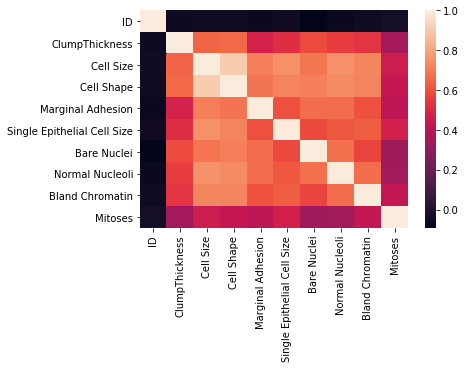

In [15]:
sns.heatmap(bc_df.corr())

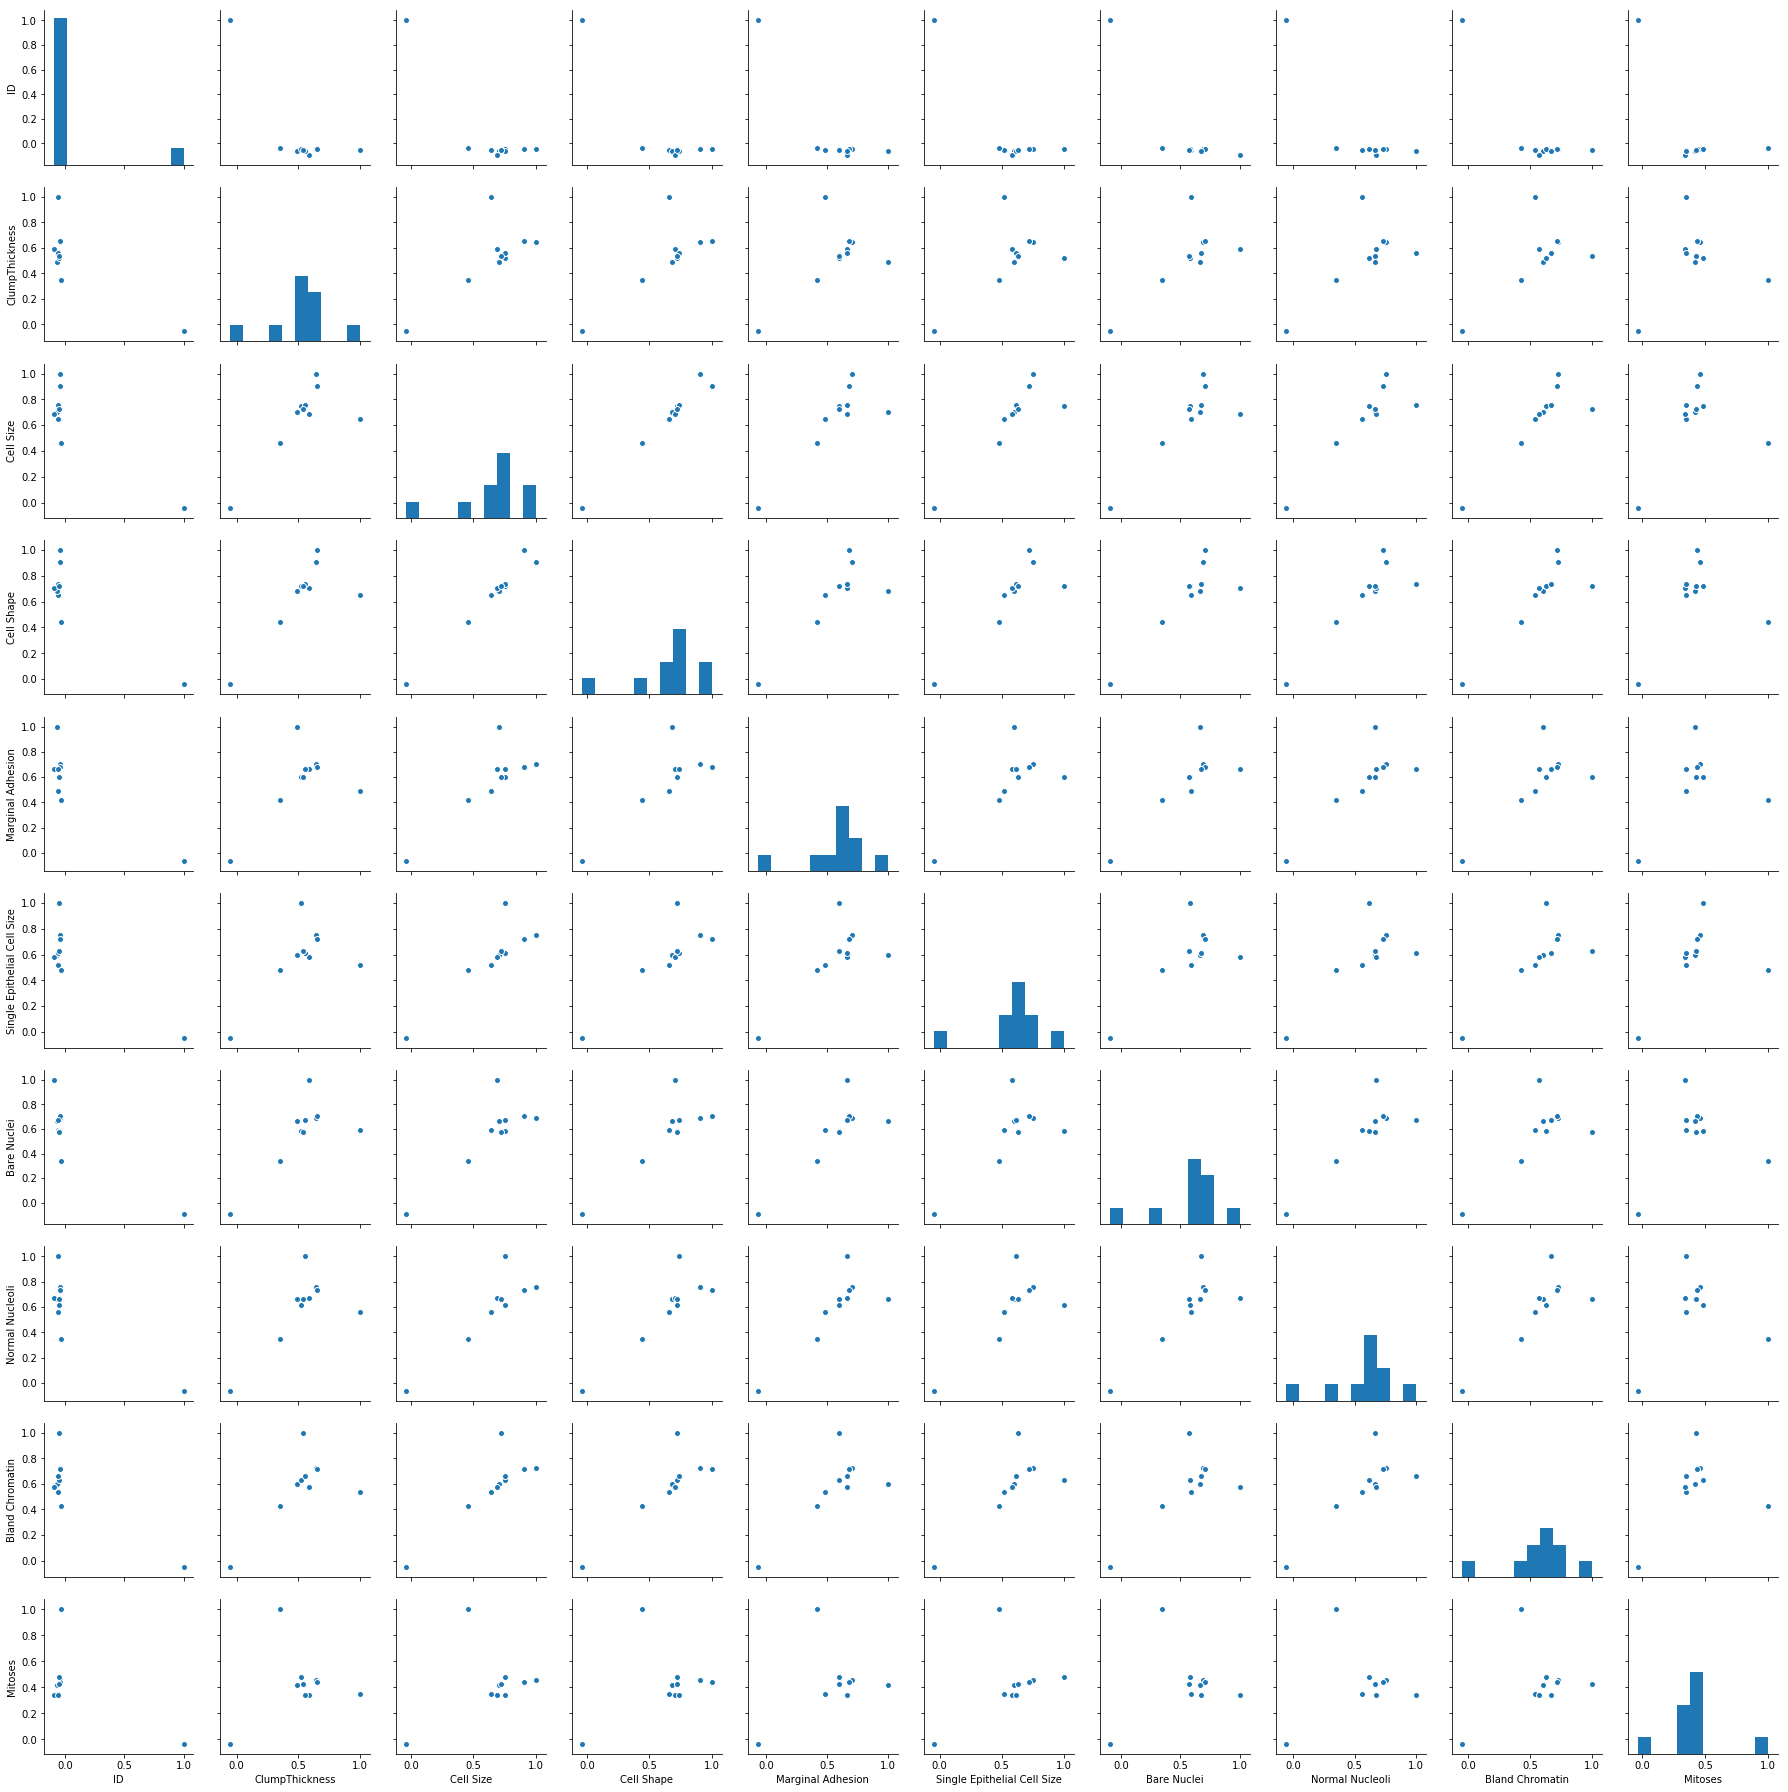

In [16]:
sns.pairplot(bc_df.corr())

### Divide the dataset into feature set and target set

In [33]:
target_df = bc_df ['Class'].astype('category')
target_df.dtype
#feature_df = bc_df.drop(columns='Class', axis=1)

CategoricalDtype(categories=[2, 4], ordered=False)

### Divide the Training and Test sets in 70:30 

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(feature_df,target_df, test_size=0.30,random_state=42)
x_train.shape,x_test.shape

((489, 10), (210, 10))

### Model 1 : Implement a default Decision Tree model with no attributes

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini')
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [36]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))

                                  Imp
ID                           0.014414
ClumpThickness               0.056520
Cell Size                    0.000000
Cell Shape                   0.726395
Marginal Adhesion            0.011395
Single Epithelial Cell Size  0.015533
Bare Nuclei                  0.129127
Normal Nucleoli              0.006886
Bland Chromatin              0.028578
Mitoses                      0.011152


### Check the training & test accuracy of model 1 

In [37]:
y_predict = dt_model.predict(x_test)
print(dt_model.score(x_train , y_train))
print(dt_model.score(x_test , y_test))

1.0
0.9380952380952381


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10,max_leaf_nodes=5)
dt_model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

### Check the training & test accuracy of model 2

In [39]:
y_predict = dt_model.predict(x_test)
print(dt_model.score(x_train , y_train))
print(dt_model.score(x_test , y_test))

0.9570552147239264
0.9380952380952381


### Print the confusion matrix of model 1 and model 2

In [42]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_predict))

[[132  11]
 [  2  65]]
